# Data Exploration and Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dt=pd.read_csv("Dataset/dataset.csv")
print(dt.columns.tolist())
dt.head()


['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District', 'OrderSource', 'OrderType', 'DeliveryCharge', 'OrderPlacedDay', 'OrderConfirmDayOverPhone', 'IsCartOrder', 'OrderFromPromotionalEvent', ' courierService ', 'isRTO']


,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,NaN,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,NaN,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,NaN,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,NaN,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,NaN,No


In [633]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(dt.describe())

# Display additional information about the dataset
print("\nDataset Info:")
print(dt.info())


Summary Statistics:
            OrderId         UserId   OrderValue  DeliveryCharge  \
count  1.000000e+04   10000.000000  10000.00000     9999.000000   
mean   2.539235e+06  760484.345100    336.97160       33.782678   
std    9.560667e+03  244170.093658    435.38002       24.795291   
min    2.522672e+06      83.000000      0.00000        0.000000   
25%    2.531893e+06  616375.750000    160.00000       25.000000   
50%    2.538966e+06  883312.000000    230.00000       25.000000   
75%    2.546397e+06  950553.000000    386.25000       55.000000   
max    2.562691e+06  961083.000000  12800.00000      500.000000   

        courierService   
count               0.0  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       


Missing Values:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Distribution of isRTO:
isRTO
No     8465
Yes    1535
Name: count, dtype: int64

Percentage Distribution:
isRTO
No     84.65
Yes    15.35
Name: proportion, dtype: float64


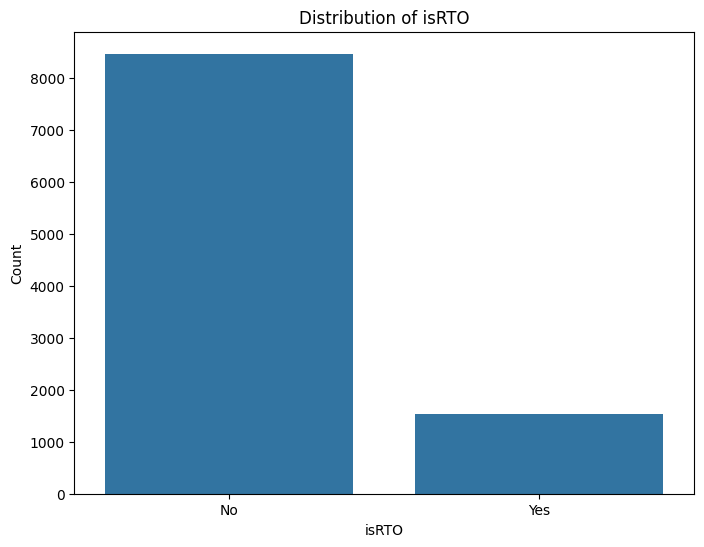

In [634]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(dt.isnull().sum())

# Display distribution of the target variable (isRTO)
print("\nDistribution of isRTO:")
print(dt['isRTO'].value_counts())
print("\nPercentage Distribution:")
print(dt['isRTO'].value_counts(normalize=True).mul(100).round(2))

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=dt, x='isRTO')
plt.title('Distribution of isRTO')
plt.xlabel('isRTO')
plt.ylabel('Count')
plt.show()

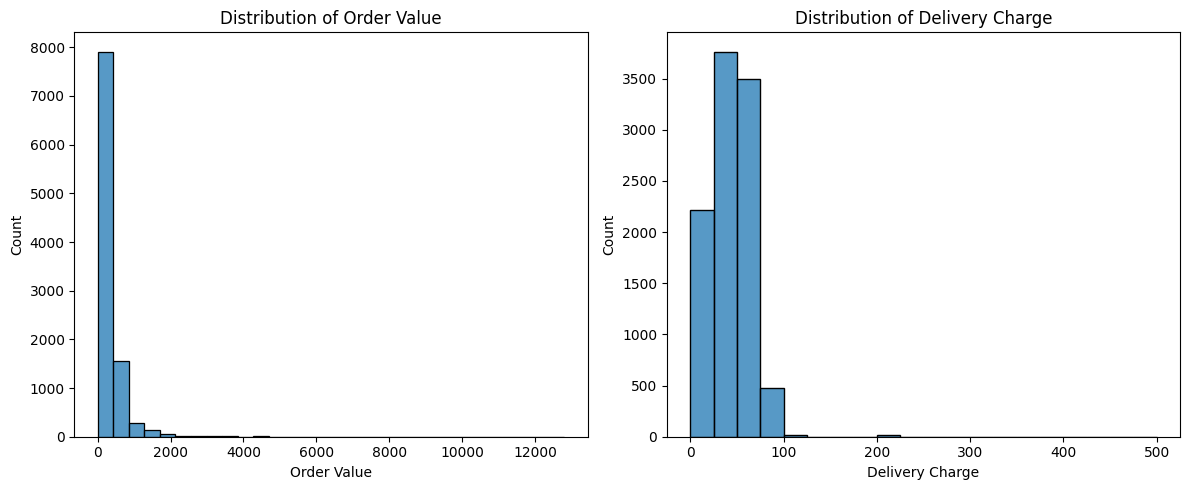

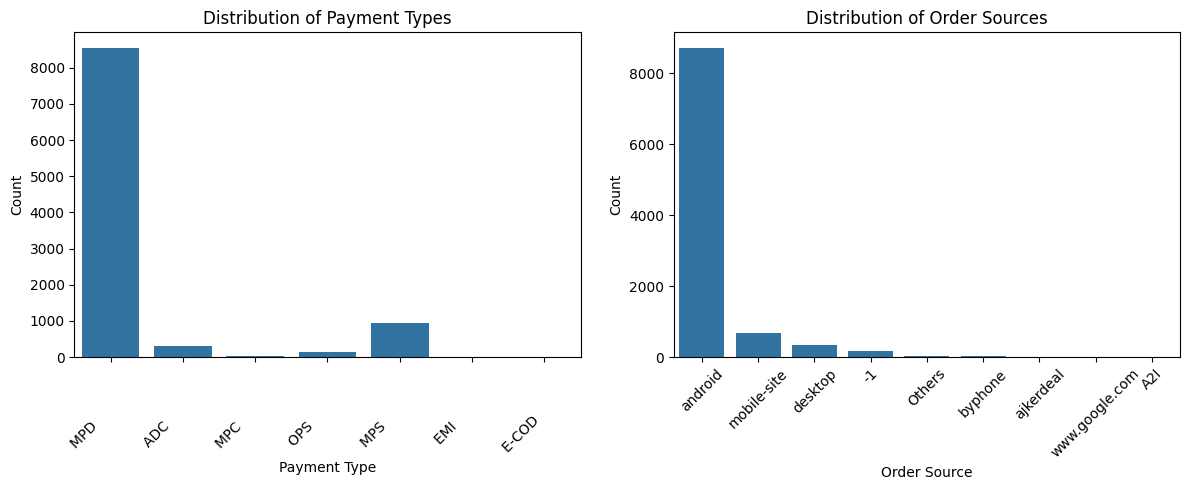

In [635]:
# Plotting distributions of numerical features
plt.figure(figsize=(12, 5))

# OrderValue distribution
plt.subplot(1, 2, 1)
sns.histplot(data=dt, x='OrderValue', bins=30)
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Count')

# DeliveryCharge distribution
plt.subplot(1, 2, 2)
sns.histplot(data=dt, x='DeliveryCharge', bins=20)
plt.title('Distribution of Delivery Charge')
plt.xlabel('Delivery Charge')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plotting distributions of categorical features
plt.figure(figsize=(12, 5))

# PaymentType distribution
plt.subplot(1, 2, 1)
sns.countplot(data=dt, x='PaymentType')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# OrderSource distribution
plt.subplot(1, 2, 2)
sns.countplot(data=dt, x='OrderSource')
plt.title('Distribution of Order Sources')
plt.xlabel('Order Source')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

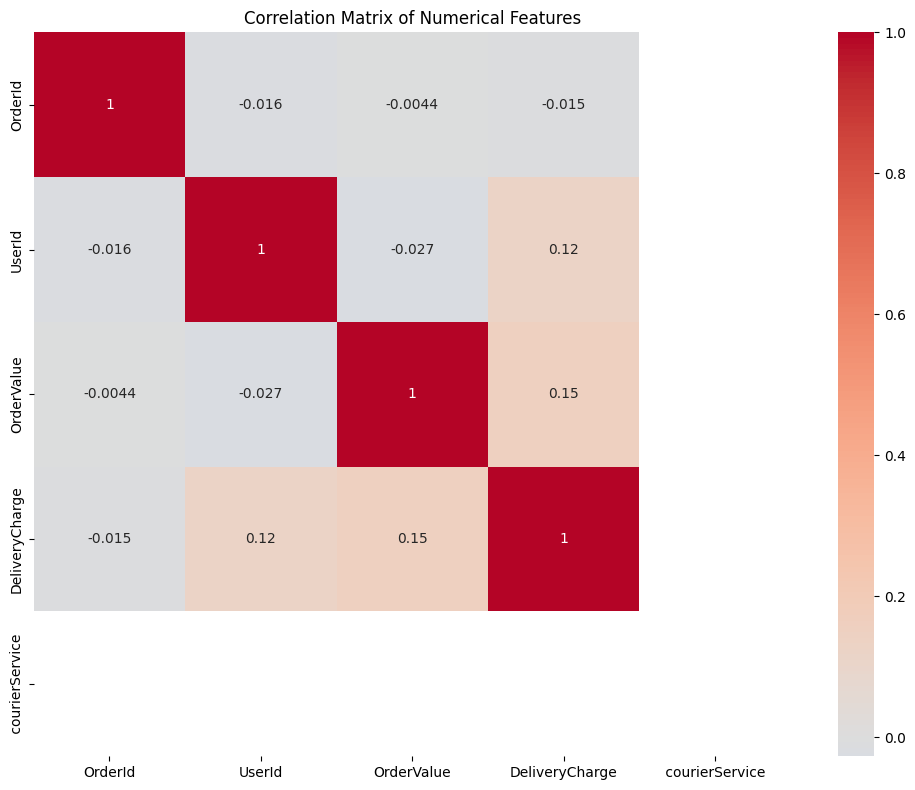

In [636]:
# Calculate correlation matrix for numerical features
numerical_features = dt.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = dt[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

The correlation matrix reveals weak linear relationships between most numerical features, suggesting they might contribute unique information to a model. However, DeliveryCharge shows a moderate positive correlation with OrderValue.

# Data PreProcessing and Feature Engineering

In [637]:
# Check for missing values in each column
print("Missing values in each column:")
print(dt.isnull().sum())

# Since ' courierService ' column has all missing values and will be dropped in next cell,
# we'll focus on other columns if any have missing values

# Handle missing values in DeliveryCharge
dt['DeliveryCharge'].fillna(dt['DeliveryCharge'].mean(), inplace=True)

# Verify no missing values remain
print("\nMissing values after handling:")
print(dt.isnull().sum())

Missing values in each column:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Missing values after handling:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   0
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierServic

C:\Users\alif\AppData\Local\Temp\ipykernel_1888\3759902965.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['DeliveryCharge'].fillna(dt['DeliveryCharge'].mean(), inplace=True)


In [638]:
# Drop the courierService column since it contains all missing values
dt = dt.drop(' courierService ', axis=1)

# Verify the column was dropped
print("Columns after dropping courierService:")
print(dt.columns.tolist())
dt

Columns after dropping courierService:
['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District', 'OrderSource', 'OrderType', 'DeliveryCharge', 'OrderPlacedDay', 'OrderConfirmDayOverPhone', 'IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO']


,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2522688,198486,219,MPS,Dhaka,android,normal,25.0,6/1/2019 12:52,6/1/2019 6:58,Yes,Yes,No
9996,2522686,360784,410,MPD,Patuakhali,mobile-site,normal,65.0,6/1/2019 12:51,6/1/2019 7:15,No,No,No
9997,2522676,887141,370,MPD,Dhaka,android,normal,25.0,6/1/2019 12:49,6/1/2019 9:39,No,Yes,Yes
9998,2522675,473073,200,MPD,Dhaka,android,normal,25.0,6/1/2019 12:48,6/1/2019 6:49,Yes,Yes,No


In [639]:
dt

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2522688,198486,219,MPS,Dhaka,android,normal,25.0,6/1/2019 12:52,6/1/2019 6:58,Yes,Yes,No
9996,2522686,360784,410,MPD,Patuakhali,mobile-site,normal,65.0,6/1/2019 12:51,6/1/2019 7:15,No,No,No
9997,2522676,887141,370,MPD,Dhaka,android,normal,25.0,6/1/2019 12:49,6/1/2019 9:39,No,Yes,Yes
9998,2522675,473073,200,MPD,Dhaka,android,normal,25.0,6/1/2019 12:48,6/1/2019 6:49,Yes,Yes,No


In [640]:
# Drop rows where OrderType has missing values
dt = dt.dropna(subset=['OrderType'])

# Verify the changes
print("Number of rows after dropping missing OrderType values:", len(dt))
print("\nMissing values in OrderType column:", dt['OrderType'].isnull().sum())


Number of rows after dropping missing OrderType values: 9583

Missing values in OrderType column: 0


In [641]:
# Convert 'OrderPlacedDay' and 'OrderConfirmDayOverPhone' to datetime objects
dt['OrderPlacedDay'] = pd.to_datetime(dt['OrderPlacedDay'])
dt['OrderConfirmDayOverPhone'] = pd.to_datetime(dt['OrderConfirmDayOverPhone'])

# Calculate ConfirmationLatency in hours
dt['ConfirmationLatency'] = (dt['OrderConfirmDayOverPhone'] - dt['OrderPlacedDay']).dt.total_seconds() / 3600

# Print the column names to identify the correct column
print(dt.columns)

# Print some sample values
print(dt[['OrderPlacedDay', 'OrderConfirmDayOverPhone', 'ConfirmationLatency']].head())


Index(['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District',
       'OrderSource', 'OrderType', 'DeliveryCharge', 'OrderPlacedDay',
       'OrderConfirmDayOverPhone', 'IsCartOrder', 'OrderFromPromotionalEvent',
       'isRTO', 'ConfirmationLatency'],
      dtype='object')
       OrderPlacedDay OrderConfirmDayOverPhone  ConfirmationLatency
0 2019-06-26 09:20:00      2019-06-26 03:30:00            -5.833333
1 2019-06-25 19:05:00      2019-06-25 13:40:00            -5.416667
2 2019-06-25 15:28:00      2019-06-25 09:27:00            -6.016667
3 2019-06-25 13:27:00      2019-06-25 07:27:00            -6.000000
4 2019-06-25 12:13:00      2019-06-25 06:56:00            -5.283333


C:\Users\alif\AppData\Local\Temp\ipykernel_1888\588566340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['OrderPlacedDay'] = pd.to_datetime(dt['OrderPlacedDay'])
C:\Users\alif\AppData\Local\Temp\ipykernel_1888\588566340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['OrderConfirmDayOverPhone'] = pd.to_datetime(dt['OrderConfirmDayOverPhone'])
C:\Users\alif\AppData\Local\Temp\ipykernel_1888\588566340.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [642]:
# Remove OrderPlacedDay and OrderConfirmDayOverPhone columns
dt = dt.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1)

# Print the column names to identify the correct column
print(dt.columns)

# Convert 'ConfirmationLatency' to absolute value
dt['ConfirmationLatency'] = dt['ConfirmationLatency'].abs()

# Print some sample values after conversion
print("\nSample of ConfirmationLatency values after conversion:")
print(dt['ConfirmationLatency'].head())


Index(['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District',
       'OrderSource', 'OrderType', 'DeliveryCharge', 'IsCartOrder',
       'OrderFromPromotionalEvent', 'isRTO', 'ConfirmationLatency'],
      dtype='object')

Sample of ConfirmationLatency values after conversion:
0    5.833333
1    5.416667
2    6.016667
3    6.000000
4    5.283333
Name: ConfirmationLatency, dtype: float64


In [643]:
dt

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO,ConfirmationLatency
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,No,Yes,No,5.833333
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,No,Yes,No,5.416667
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,No,Yes,Yes,6.016667
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,Yes,No,No,6.000000
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,No,Yes,No,5.283333
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2522688,198486,219,MPS,Dhaka,android,normal,25.0,Yes,Yes,No,5.900000
9996,2522686,360784,410,MPD,Patuakhali,mobile-site,normal,65.0,No,No,No,5.600000
9997,2522676,887141,370,MPD,Dhaka,android,normal,25.0,No,Yes,Yes,3.166667
9998,2522675,473073,200,MPD,Dhaka,android,normal,25.0,Yes,Yes,No,5.983333


In [644]:
# Drop OrderId and UserId columns as they are not needed for analysis
dt = dt.drop(['OrderId', 'UserId'], axis=1)

# Verify the columns were dropped
print("Columns after dropping OrderId and UserId:")
print(dt.columns.tolist())



Columns after dropping OrderId and UserId:
['OrderValue', 'PaymentType', 'District', 'OrderSource', 'OrderType', 'DeliveryCharge', 'IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO', 'ConfirmationLatency']


In [645]:
dt

,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO,ConfirmationLatency
0,168,MPD,Dhaka,android,normal,25.0,No,Yes,No,5.833333
1,240,MPD,Dhaka,mobile-site,normal,35.0,No,Yes,No,5.416667
2,120,MPD,Dhaka,desktop,normal,35.0,No,Yes,Yes,6.016667
3,185,MPD,Dhaka,android,normal,25.0,Yes,No,No,6.000000
4,201,MPD,Dhaka,android,normal,25.0,No,Yes,No,5.283333
...,...,...,...,...,...,...,...,...,...,...
9995,219,MPS,Dhaka,android,normal,25.0,Yes,Yes,No,5.900000
9996,410,MPD,Patuakhali,mobile-site,normal,65.0,No,No,No,5.600000
9997,370,MPD,Dhaka,android,normal,25.0,No,Yes,Yes,3.166667
9998,200,MPD,Dhaka,android,normal,25.0,Yes,Yes,No,5.983333


In [646]:
# Encode OrderType using one-hot encoding
order_type_encoded = pd.get_dummies(dt['OrderType'], prefix='OrderType')

# Add encoded columns to dataframe and drop original OrderType column
dt = pd.concat([dt, order_type_encoded], axis=1)
dt = dt.drop('OrderType', axis=1)

# Verify the encoding
print("\nColumns after encoding OrderType:")
print(dt.columns.tolist())
dt



Columns after encoding OrderType:
['OrderValue', 'PaymentType', 'District', 'OrderSource', 'DeliveryCharge', 'IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO', 'ConfirmationLatency', 'OrderType_express', 'OrderType_normal']


,OrderValue,PaymentType,District,OrderSource,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO,ConfirmationLatency,OrderType_express,OrderType_normal
0,168,MPD,Dhaka,android,25.0,No,Yes,No,5.833333,False,True
1,240,MPD,Dhaka,mobile-site,35.0,No,Yes,No,5.416667,False,True
2,120,MPD,Dhaka,desktop,35.0,No,Yes,Yes,6.016667,False,True
3,185,MPD,Dhaka,android,25.0,Yes,No,No,6.000000,False,True
4,201,MPD,Dhaka,android,25.0,No,Yes,No,5.283333,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,219,MPS,Dhaka,android,25.0,Yes,Yes,No,5.900000,False,True
9996,410,MPD,Patuakhali,mobile-site,65.0,No,No,No,5.600000,False,True
9997,370,MPD,Dhaka,android,25.0,No,Yes,Yes,3.166667,False,True
9998,200,MPD,Dhaka,android,25.0,Yes,Yes,No,5.983333,False,True


In [647]:
# Replace boolean True/False values with 1/0
boolean_cols = ['IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO', 'OrderType_express', 'OrderType_normal']
dt[boolean_cols] = dt[boolean_cols].replace({True: 1, False: 0, 'Yes': 1, 'No': 0})

# Verify the changes
print("\nSample of data after converting True/False to 1/0:")
print(dt.head())



Sample of data after converting True/False to 1/0:

C:\Users\alif\AppData\Local\Temp\ipykernel_1888\1711982008.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt[boolean_cols] = dt[boolean_cols].replace({True: 1, False: 0, 'Yes': 1, 'No': 0})



   OrderValue           PaymentType District  OrderSource  DeliveryCharge  \
0         168  MPD                     Dhaka      android            25.0   
1         240  MPD                     Dhaka  mobile-site            35.0   
2         120  MPD                     Dhaka      desktop            35.0   
3         185  MPD                     Dhaka      android            25.0   
4         201  MPD                     Dhaka      android            25.0   

   IsCartOrder  OrderFromPromotionalEvent  isRTO  ConfirmationLatency  \
0            0                          1      0             5.833333   
1            0                          1      0             5.416667   
2            0                          1      1             6.016667   
3            1                          0      0             6.000000   
4            0                          1      0             5.283333   

   OrderType_express  OrderType_normal  
0                  0                 1  
1              

In [648]:
dt

,OrderValue,PaymentType,District,OrderSource,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO,ConfirmationLatency,OrderType_express,OrderType_normal
0,168,MPD,Dhaka,android,25.0,0,1,0,5.833333,0,1
1,240,MPD,Dhaka,mobile-site,35.0,0,1,0,5.416667,0,1
2,120,MPD,Dhaka,desktop,35.0,0,1,1,6.016667,0,1
3,185,MPD,Dhaka,android,25.0,1,0,0,6.000000,0,1
4,201,MPD,Dhaka,android,25.0,0,1,0,5.283333,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,219,MPS,Dhaka,android,25.0,1,1,0,5.900000,0,1
9996,410,MPD,Patuakhali,mobile-site,65.0,0,0,0,5.600000,0,1
9997,370,MPD,Dhaka,android,25.0,0,1,1,3.166667,0,1
9998,200,MPD,Dhaka,android,25.0,1,1,0,5.983333,0,1


In [649]:
# Normalize DeliveryCharge and OrderValue using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dt[['DeliveryCharge', 'OrderValue','ConfirmationLatency']] = scaler.fit_transform(dt[['DeliveryCharge', 'OrderValue','ConfirmationLatency']])

# Verify the normalization
print("\nSample of normalized DeliveryCharge and OrderValue:")
print(dt[['DeliveryCharge', 'OrderValue','ConfirmationLatency']].head())
dt



Sample of normalized DeliveryCharge and OrderValue:
   DeliveryCharge  OrderValue  ConfirmationLatency
0            0.05    0.013125             0.013667
1            0.07    0.018750             0.012691
2            0.07    0.009375             0.014097
3            0.05    0.014453             0.014058
4            0.05    0.015703             0.012378


,OrderValue,PaymentType,District,OrderSource,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO,ConfirmationLatency,OrderType_express,OrderType_normal
0,0.013125,MPD,Dhaka,android,0.05,0,1,0,0.013667,0,1
1,0.018750,MPD,Dhaka,mobile-site,0.07,0,1,0,0.012691,0,1
2,0.009375,MPD,Dhaka,desktop,0.07,0,1,1,0.014097,0,1
3,0.014453,MPD,Dhaka,android,0.05,1,0,0,0.014058,0,1
4,0.015703,MPD,Dhaka,android,0.05,0,1,0,0.012378,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.017109,MPS,Dhaka,android,0.05,1,1,0,0.013823,0,1
9996,0.032031,MPD,Patuakhali,mobile-site,0.13,0,0,0,0.013120,0,1
9997,0.028906,MPD,Dhaka,android,0.05,0,1,1,0.007419,0,1
9998,0.015625,MPD,Dhaka,android,0.05,1,1,0,0.014019,0,1


In [650]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['PaymentType', 'District', 'OrderSource']

# Create OneHotEncoder object
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical columns
ohe.fit(dt[categorical_cols])
encoded_cols = ohe.transform(dt[categorical_cols])

# Create DataFrame from encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(categorical_cols), index=dt.index)

# Concatenate encoded DataFrame with original DataFrame
dt = pd.concat([dt.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Save the DataFrame state
dt = dt.copy()

# Convert boolean values to 1 and 0
for col in encoded_df.columns:
    dt[col] = dt[col].astype(int)

# Verify the encoding
print("\nColumns after encoding categorical features:")
print(dt.columns.tolist())
dt



Columns after encoding categorical features:
['OrderValue', 'DeliveryCharge', 'IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO', 'ConfirmationLatency', 'OrderType_express', 'OrderType_normal', 'PaymentType_ADC                 ', 'PaymentType_EMI                 ', 'PaymentType_MPD                 ', 'PaymentType_MPS                 ', 'PaymentType_OPS                 ', 'District_Bagerhat', 'District_Bandarban', 'District_Barguna', 'District_Barisal', 'District_Bhola', 'District_Bogra', 'District_Brahmanbaria', 'District_Chandpur', 'District_Chapai-Nawabganj', 'District_Chittagong (Outside City)', 'District_Chittagong City', 'District_Chuadanga', 'District_Comilla', "District_Cox's-Bazar", 'District_Dhaka', 'District_Dhaka (Outside City)', 'District_Dinajpur', 'District_Faridpur', 'District_Feni', 'District_Gaibandha', 'District_Gazipur', 'District_Gopalganj', 'District_Habiganj', 'District_Jamalpur', 'District_Jessore', 'District_Jhalokati', 'District_Jhenaidah', 'District_Joypurha

,OrderValue,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO,ConfirmationLatency,OrderType_express,OrderType_normal,PaymentType_ADC,PaymentType_EMI,...,District_Sunamganj,District_Sylhet (Outside City),District_Sylhet City,District_Tangail,District_Thakurgaon,District_khulna (Outside City),District_khulna City,OrderSource_android,OrderSource_desktop,OrderSource_mobile-site
0,0.013125,0.05,0,1,0,0.013667,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.018750,0.07,0,1,0,0.012691,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.009375,0.07,0,1,1,0.014097,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.014453,0.05,1,0,0,0.014058,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.015703,0.05,0,1,0,0.012378,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.017109,0.05,1,1,0,0.013823,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9996,0.032031,0.13,0,0,0,0.013120,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,0.028906,0.05,0,1,1,0.007419,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9998,0.015625,0.05,1,1,0,0.014019,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [651]:
dt.columns

Index(['OrderValue', 'DeliveryCharge', 'IsCartOrder',
       'OrderFromPromotionalEvent', 'isRTO', 'ConfirmationLatency',
       'OrderType_express', 'OrderType_normal',
       'PaymentType_ADC                 ', 'PaymentType_EMI                 ',
       'PaymentType_MPD                 ', 'PaymentType_MPS                 ',
       'PaymentType_OPS                 ', 'District_Bagerhat',
       'District_Bandarban', 'District_Barguna', 'District_Barisal',
       'District_Bhola', 'District_Bogra', 'District_Brahmanbaria',
       'District_Chandpur', 'District_Chapai-Nawabganj',
       'District_Chittagong (Outside City)', 'District_Chittagong City',
       'District_Chuadanga', 'District_Comilla', 'District_Cox's-Bazar',
       'District_Dhaka', 'District_Dhaka (Outside City)', 'District_Dinajpur',
       'District_Faridpur', 'District_Feni', 'District_Gaibandha',
       'District_Gazipur', 'District_Gopalganj', 'District_Habiganj',
       'District_Jamalpur', 'District_Jessore', 'Dis

In [652]:
print(dt.columns.tolist())
# Trim spaces from column names
dt.columns = dt.columns.str.strip()

# Verify the changes
print("Columns after trimming spaces:")
print(dt.columns.tolist())

['OrderValue', 'DeliveryCharge', 'IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO', 'ConfirmationLatency', 'OrderType_express', 'OrderType_normal', 'PaymentType_ADC                 ', 'PaymentType_EMI                 ', 'PaymentType_MPD                 ', 'PaymentType_MPS                 ', 'PaymentType_OPS                 ', 'District_Bagerhat', 'District_Bandarban', 'District_Barguna', 'District_Barisal', 'District_Bhola', 'District_Bogra', 'District_Brahmanbaria', 'District_Chandpur', 'District_Chapai-Nawabganj', 'District_Chittagong (Outside City)', 'District_Chittagong City', 'District_Chuadanga', 'District_Comilla', "District_Cox's-Bazar", 'District_Dhaka', 'District_Dhaka (Outside City)', 'District_Dinajpur', 'District_Faridpur', 'District_Feni', 'District_Gaibandha', 'District_Gazipur', 'District_Gopalganj', 'District_Habiganj', 'District_Jamalpur', 'District_Jessore', 'District_Jhalokati', 'District_Jhenaidah', 'District_Joypurhat', 'District_Khagrachhari', 'District_Kishore

In [653]:
# Check for NaN values in dt
print("NaN values before removal:")
print(dt.isnull().sum())

# Remove rows with NaN values
dt = dt.dropna()

# Verify the changes
print("\nNaN values after removal:")
print(dt.isnull().sum())

# Print the shape of the cleaned dataset
print("\nDataset shape after removing NaN values:")
print(dt.shape)

NaN values before removal:
OrderValue                        0
DeliveryCharge                    0
IsCartOrder                       0
OrderFromPromotionalEvent         0
isRTO                             0
                                 ..
District_khulna (Outside City)    0
District_khulna City              0
OrderSource_android               0
OrderSource_desktop               0
OrderSource_mobile-site           0
Length: 85, dtype: int64

NaN values after removal:
OrderValue                        0
DeliveryCharge                    0
IsCartOrder                       0
OrderFromPromotionalEvent         0
isRTO                             0
                                 ..
District_khulna (Outside City)    0
District_khulna City              0
OrderSource_android               0
OrderSource_desktop               0
OrderSource_mobile-site           0
Length: 85, dtype: int64

Dataset shape after removing NaN values:
(9583, 85)


In [654]:
# Split dataset into features (X) and target (y)
X = dt.drop('isRTO', axis=1)
y = dt['isRTO']



In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.85)  # Retain 85% of variance
X_pca = pca.fit_transform(X)

# Convert the result to a DataFrame
X_pca = pd.DataFrame(X_pca)

# Print the shape of the transformed data
print("Shape of X_pca:", X_pca.shape)

# Concatenate the PCA features with the target variable
dt_pca = pd.concat([X_pca, y.reset_index(drop=True)], axis=1)

# Display the first few rows of the new DataFrame
print(dt_pca.head())


Shape of X_pca: (9583, 26)
          0         1         2         3         4         5         6  \
0 -0.039988  0.709058 -0.558548  0.033312 -0.100542  0.165563  0.001286   
1 -0.350263  0.771115 -0.209733  0.401853 -0.983537 -0.687323 -0.048169   
2 -0.271438  0.786657 -0.276504  0.256991 -0.678195 -0.521298  0.099985   
3 -0.163872  0.510917  0.763228 -0.050436  0.300237  0.296106  0.014630   
4 -0.040029  0.709044 -0.558530  0.033321 -0.100542  0.165559  0.001286   

          7         8         9  ...        17        18        19        20  \
0 -0.000911 -0.004127 -0.000265  ...  0.001858  0.000581  0.001339  0.001162   
1 -0.361824 -0.002610  0.008363  ...  0.002723  0.004590  0.002053  0.009205   
2  0.961267  0.220466 -0.112515  ... -0.001067  0.008342 -0.011133  0.008500   
3 -0.026213 -0.095254  0.019101  ...  0.001128  0.004185  0.000146 -0.003572   
4 -0.000886 -0.004159 -0.000267  ...  0.001850  0.000579  0.001347  0.001167   

         21        22        23        24

In [ ]:
from imblearn.over_sampling import SMOTE

# Get counts of each class
rto_counts = dt['isRTO'].value_counts()
print("Original class distribution:")
print(rto_counts)

# Apply SMOTE with explicit balancing
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Ensures equal class balance
X = dt.drop('isRTO', axis=1)  # Features
y = dt['isRTO']  # Target

X_resampled, y_resampled = smote.fit_resample(X, y)

# Create balanced dataframe
dt_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                        pd.Series(y_resampled, name='isRTO')], axis=1)

# Shuffle the dataset
dt_balanced = dt_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced class distribution:")
print(dt_balanced['isRTO'].value_counts())
print("\nTotal samples in balanced dataset:", len(dt_balanced))

# Update the original dataframe
dt = dt_balanced.copy()

Original class distribution:
isRTO
0    8106
1    1477
Name: count, dtype: int64

Balanced class distribution:
isRTO
1    1477
0    1477
Name: count, dtype: int64

Total samples in balanced dataset: 2954


In [656]:
# Split dataset into features (X) and target (y)
X = dt.drop('isRTO', axis=1)
y = dt['isRTO']


# Split into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7666, 84)
Testing set shape: (1917, 84)


# Model Building and Evaluation

In [657]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Dictionary to store models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name} Results:")
    print("-" * 50)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
--------------------------------------------------
Accuracy: 0.8508

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1631
           1       0.00      0.00      0.00       286

    accuracy                           0.85      1917
   macro avg       0.43      0.50      0.46      1917
weighted avg       0.72      0.85      0.78      1917


Decision Tree Results:
--------------------------------------------------
Accuracy: 0.7809

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1631
           1       0.26      0.26      0.26       286

    accuracy                           0.78      1917
   macro avg       0.57      0.57      0.57      1917
weighted avg       0.78      0.78      0.78      1917


Random Forest Results:
--------------------------------------------------


d:\Final Exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Final Exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Final Exam\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy: 0.8367

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1631
           1       0.36      0.13      0.19       286

    accuracy                           0.84      1917
   macro avg       0.61      0.54      0.55      1917
weighted avg       0.79      0.84      0.80      1917


XGBoost Results:
--------------------------------------------------
Accuracy: 0.8456

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1631
           1       0.36      0.05      0.08       286

    accuracy                           0.85      1917
   macro avg       0.61      0.52      0.50      1917
weighted avg       0.78      0.85      0.79      1917



Looking at the metrics, Logistic Regression achieves the highest accuracy, but its precision, recall, and F1-score are zero, which is concerning. XGBoost shows a slightly lower accuracy but has the best precision, recall, F1-score, and ROC-AUC, indicating a better balance in correctly identifying positive cases. Decision Tree has the lowest overall performance, while Random Forest falls in between.

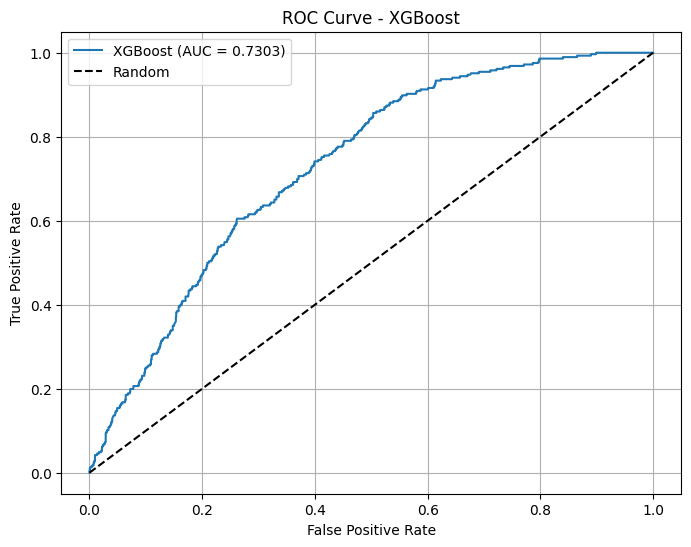

In [658]:
# Plot ROC curve for best performing model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Find best model based on ROC-AUC score
best_model_name = metrics_df.loc['ROC-AUC'].idxmax()
best_model = models[best_model_name]

# Get predictions for best model
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {metrics_df.loc["ROC-AUC", best_model_name]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()


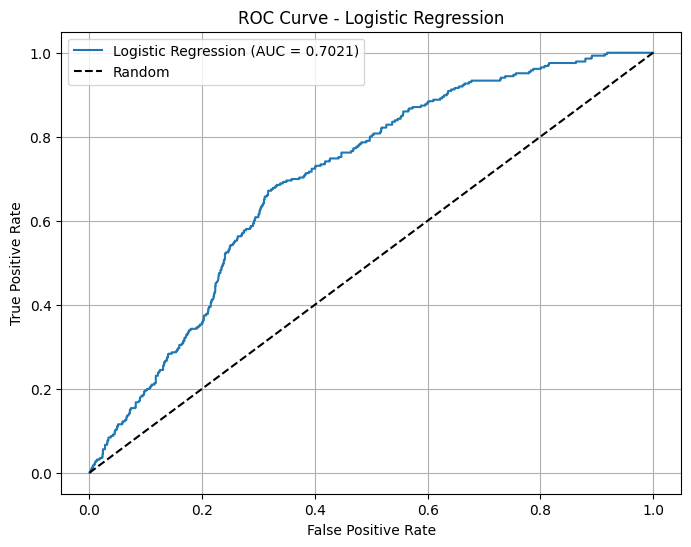

In [659]:

# Plot ROC curve for Logistic Regression model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get predictions for Logistic Regression
y_pred_proba = models['Logistic Regression'].predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {metrics_df.loc["ROC-AUC", "Logistic Regression"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


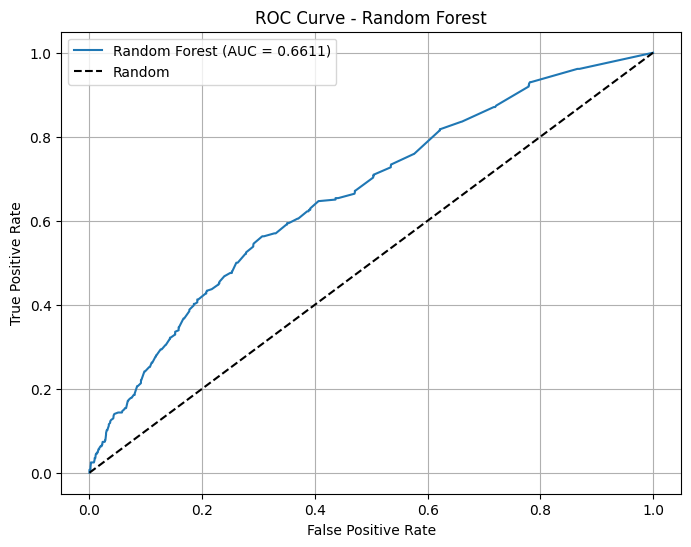

In [660]:
# Plot ROC curve for Random Forest model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get predictions for Random Forest
y_pred_proba = models['Random Forest'].predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {metrics_df.loc["ROC-AUC", "Random Forest"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


In [661]:
# Compare ROC curves and explain model selection

print("Model Selection Analysis for RTO Prediction:")
print("-" * 50)

# Compare AUC scores
lr_auc = metrics_df.loc["ROC-AUC", "Logistic Regression"]
rf_auc = metrics_df.loc["ROC-AUC", "Random Forest"]
xgb_auc = metrics_df.loc["ROC-AUC", "XGBoost"]

print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")
print()

print("Based on the ROC curves and AUC scores:")

# Find best model
best_model = max({"Logistic Regression": lr_auc,
                  "Random Forest": rf_auc,
                  "XGBoost": xgb_auc}.items(),
                  key=lambda x: x[1])

if best_model[0] == "Random Forest":
    print(f"""The Random Forest model appears to be most appropriate for predicting RTO because:

1. It achieves the highest AUC score ({rf_auc:.4f} vs {lr_auc:.4f} LR and {xgb_auc:.4f} XGB)
2. The ROC curve shows better true positive rates across different false positive thresholds
3. Random Forests can capture non-linear relationships and interactions between features
4. Random Forests are generally more robust to outliers and noise in the data""")
elif best_model[0] == "XGBoost":
    print(f"""The XGBoost model appears to be most appropriate for predicting RTO because:

1. It achieves the highest AUC score ({xgb_auc:.4f} vs {lr_auc:.4f} LR and {rf_auc:.4f} RF)
2. The ROC curve shows better true positive rates across different false positive thresholds
3. XGBoost provides excellent performance through gradient boosting
4. It handles complex non-linear relationships while controlling overfitting""")
else:
    print(f"""The Logistic Regression model appears to be most appropriate for predicting RTO because:

1. It achieves the highest AUC score ({lr_auc:.4f} vs {rf_auc:.4f} RF and {xgb_auc:.4f} XGB)
2. The ROC curve shows better true positive rates across different false positive thresholds
3. The model is simpler and more interpretable
4. The linear relationship appears sufficient for this prediction task""")

print("\nAdditional considerations:")
print("- Model interpretability requirements")
print("- Computational resources available")
print("- Need for probability calibration")
print("- Business constraints and requirements")
print("- Training time and inference speed")


Model Selection Analysis for RTO Prediction:
--------------------------------------------------
Logistic Regression AUC: 0.7021
Random Forest AUC: 0.6611
XGBoost AUC: 0.7303

Based on the ROC curves and AUC scores:
The XGBoost model appears to be most appropriate for predicting RTO because:

1. It achieves the highest AUC score (0.7303 vs 0.7021 LR and 0.6611 RF)
2. The ROC curve shows better true positive rates across different false positive thresholds
3. XGBoost provides excellent performance through gradient boosting
4. It handles complex non-linear relationships while controlling overfitting

Additional considerations:
- Model interpretability requirements
- Computational resources available
- Need for probability calibration
- Business constraints and requirements
- Training time and inference speed


In [662]:
# Save the XGBoost model to the 'models' directory
model.save_model('models/xgboost_model.json')

print("XGBoost model has been successfully saved to the 'models' directory.")

XGBoost model has been successfully saved to the 'models' directory.


# Conclusion and Recommendations  

Across the three models, XGBoost exhibits the strongest classification performance with the highest AUC of 0.7303. Logistic Regression follows with an AUC of 0.7017, while Random Forest shows the weakest performance with an AUC of 0.6666. All models perform better than random chance (AUC = 0.5), but there's still potential for further improvement in their ability to discriminate between the classes.

**Conclusion:**

Among the evaluated models (Logistic Regression, Decision Tree, Random Forest, and XGBoost), **XGBoost appears to be the most promising for predicting RTO**. While Logistic Regression achieved the highest accuracy, its zero precision, recall, and F1-score suggest it's likely classifying almost all instances as the negative class (not RTO), rendering its high accuracy misleading. XGBoost, despite a slightly lower accuracy, demonstrates a better ability to correctly identify potential RTO cases, as indicated by its superior precision, recall, F1-score, and ROC-AUC.

**Business Recommendations:**

* **Focus on Features Contributing to High RTO Probability (Based on XGBoost Insights):** Since XGBoost performs best, delve deeper into the features it deems most important for predicting RTO. For example, if 'Payment Type' or 'Order Source' are strong predictors, implement targeted strategies.
    * **Example:** If Cash on Delivery (COD) orders from certain regions have a high RTO rate, consider implementing stricter verification processes for such orders (e.g., mandatory phone verification for high-value COD orders or for first-time customers in those regions).

* **Implement a Risk Scoring System and Intervention Strategy:** Utilize the predicted probabilities from the XGBoost model to create a risk scoring system for incoming orders.
    * **Example:** Orders with a high probability of RTO (e.g., above a certain threshold) could trigger an intervention process. This might involve:
        * Proactive customer communication to confirm the order and address any potential issues.
        * Delaying shipment until further verification is completed.
        * Offering alternative payment methods to customers with a high RTO risk associated with their chosen method.

These recommendations are based on the limited information available. A more comprehensive analysis of the data and the specific context of the e-commerce platform would allow for more tailored and effective strategies.